In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression




/Users/toluodunuga/opt/miniconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
cc_apps=pd.read_csv('clean_dataset.csv',header=None)
df=pd.read_csv('clean_dataset.csv')
os.chdir('/Users/toluodunuga/Documents/GitHub/Credit Card Prediction')

In [4]:
df.head()

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,Industrials,White,1.25,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,1,Materials,Black,3.04,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,1,Materials,Black,1.50,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,1,Industrials,White,3.75,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,1,Industrials,White,1.71,1,0,0,0,ByOtherMeans,120,0,1


In [7]:
print(df.shape[1])
print(df.columns)



16
Index(['Gender', 'Age', 'Debt', 'Married', 'BankCustomer', 'Industry',
       'Ethnicity', 'YearsEmployed', 'PriorDefault', 'Employed', 'CreditScore',
       'DriversLicense', 'Citizen', 'ZipCode', 'Income', 'Approved'],
      dtype='object')


In [23]:
df.describe()

,Gender,Age,Debt,Married,BankCustomer,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,ZipCode,Income,Approved
count,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000,690.000000,690.000000
mean,0.695652,31.514116,4.758725,0.760870,0.763768,2.223406,0.523188,0.427536,2.40000,0.457971,180.547826,1017.385507,0.444928
std,0.460464,11.860245,4.978163,0.426862,0.425074,3.346513,0.499824,0.495080,4.86294,0.498592,173.970323,5210.102598,0.497318
min,0.000000,13.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,22.670000,1.000000,1.000000,1.000000,0.165000,0.000000,0.000000,0.00000,0.000000,60.000000,0.000000,0.000000
50%,1.000000,28.460000,2.750000,1.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,160.000000,5.000000,0.000000
75%,1.000000,37.707500,7.207500,1.000000,1.000000,2.625000,1.000000,1.000000,3.00000,1.000000,272.000000,395.500000,1.000000
max,1.000000,80.250000,28.000000,1.000000,1.000000,28.500000,1.000000,1.000000,67.00000,1.000000,2000.000000,100000.000000,1.000000


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          690 non-null    int64  
 1   Age             690 non-null    float64
 2   Debt            690 non-null    float64
 3   Married         690 non-null    int64  
 4   BankCustomer    690 non-null    int64  
 5   Industry        690 non-null    object 
 6   Ethnicity       690 non-null    object 
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    int64  
 9   Employed        690 non-null    int64  
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    int64  
 12  Citizen         690 non-null    object 
 13  ZipCode         690 non-null    int64  
 14  Income          690 non-null    int64  
 15  Approved        690 non-null    int64  
dtypes: float64(3), int64(10), object(3)
memory usage: 86.4+ KB


In [24]:
df.isnull().sum()

Gender            0
Age               0
Debt              0
Married           0
BankCustomer      0
Industry          0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
DriversLicense    0
Citizen           0
ZipCode           0
Income            0
Approved          0
dtype: int64

In [25]:
df.loc[df.duplicated()]


,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved


In [39]:
df["Industry"].value_counts()

Energy                   146
Materials                 78
Industrials               64
ConsumerDiscretionary     59
ConsumerStaples           54
Healthcare                53
Financials                51
InformationTechnology     41
CommunicationServices     38
Utilities                 38
Real Estate               30
Education                 25
Research                  10
Transport                  3
Name: Industry, dtype: int64

In [36]:
df["Approved"].value_counts()

0    383
1    307
Name: Approved, dtype: int64

In [26]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          690 non-null    int64  
 1   Age             690 non-null    float64
 2   Debt            690 non-null    float64
 3   Married         690 non-null    int64  
 4   BankCustomer    690 non-null    int64  
 5   Industry        690 non-null    object 
 6   Ethnicity       690 non-null    object 
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    int64  
 9   Employed        690 non-null    int64  
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    int64  
 12  Citizen         690 non-null    object 
 13  ZipCode         690 non-null    int64  
 14  Income          690 non-null    int64  
 15  Approved        690 non-null    int64  
dtypes: float64(3), int64(10), object(3)
memory usage: 86.4+ KB


## Visualization

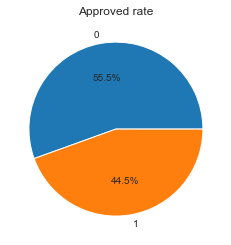

In [27]:
pie_x, pie_y = np.unique(df['Approved'], return_counts=True)
plt.pie(pie_y, labels=pie_x, autopct = '%1.1f%%') 
plt.title('Approved rate')
plt.show()

<Axes: xlabel='Ethnicity'>

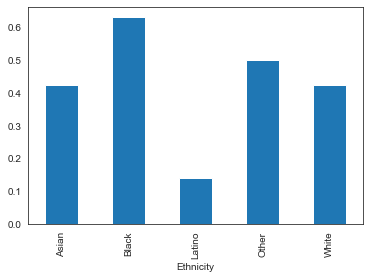

In [57]:
# Approval rate by industry
df.groupby('Ethnicity')['Approved'].mean().plot(kind='bar')

In [66]:
df.groupby("Income")["Approved"].mean()

Income
0         0.383051
1         0.068966
2         0.000000
3         0.166667
4         0.000000
            ...   
26726     1.000000
31285     1.000000
50000     1.000000
51100     1.000000
100000    1.000000
Name: Approved, Length: 240, dtype: float64

In [58]:
df.groupby('Ethnicity')['Approved'].mean()

Ethnicity
Asian     0.423729
Black     0.630435
Latino    0.140351
Other     0.500000
White     0.424020
Name: Approved, dtype: float64

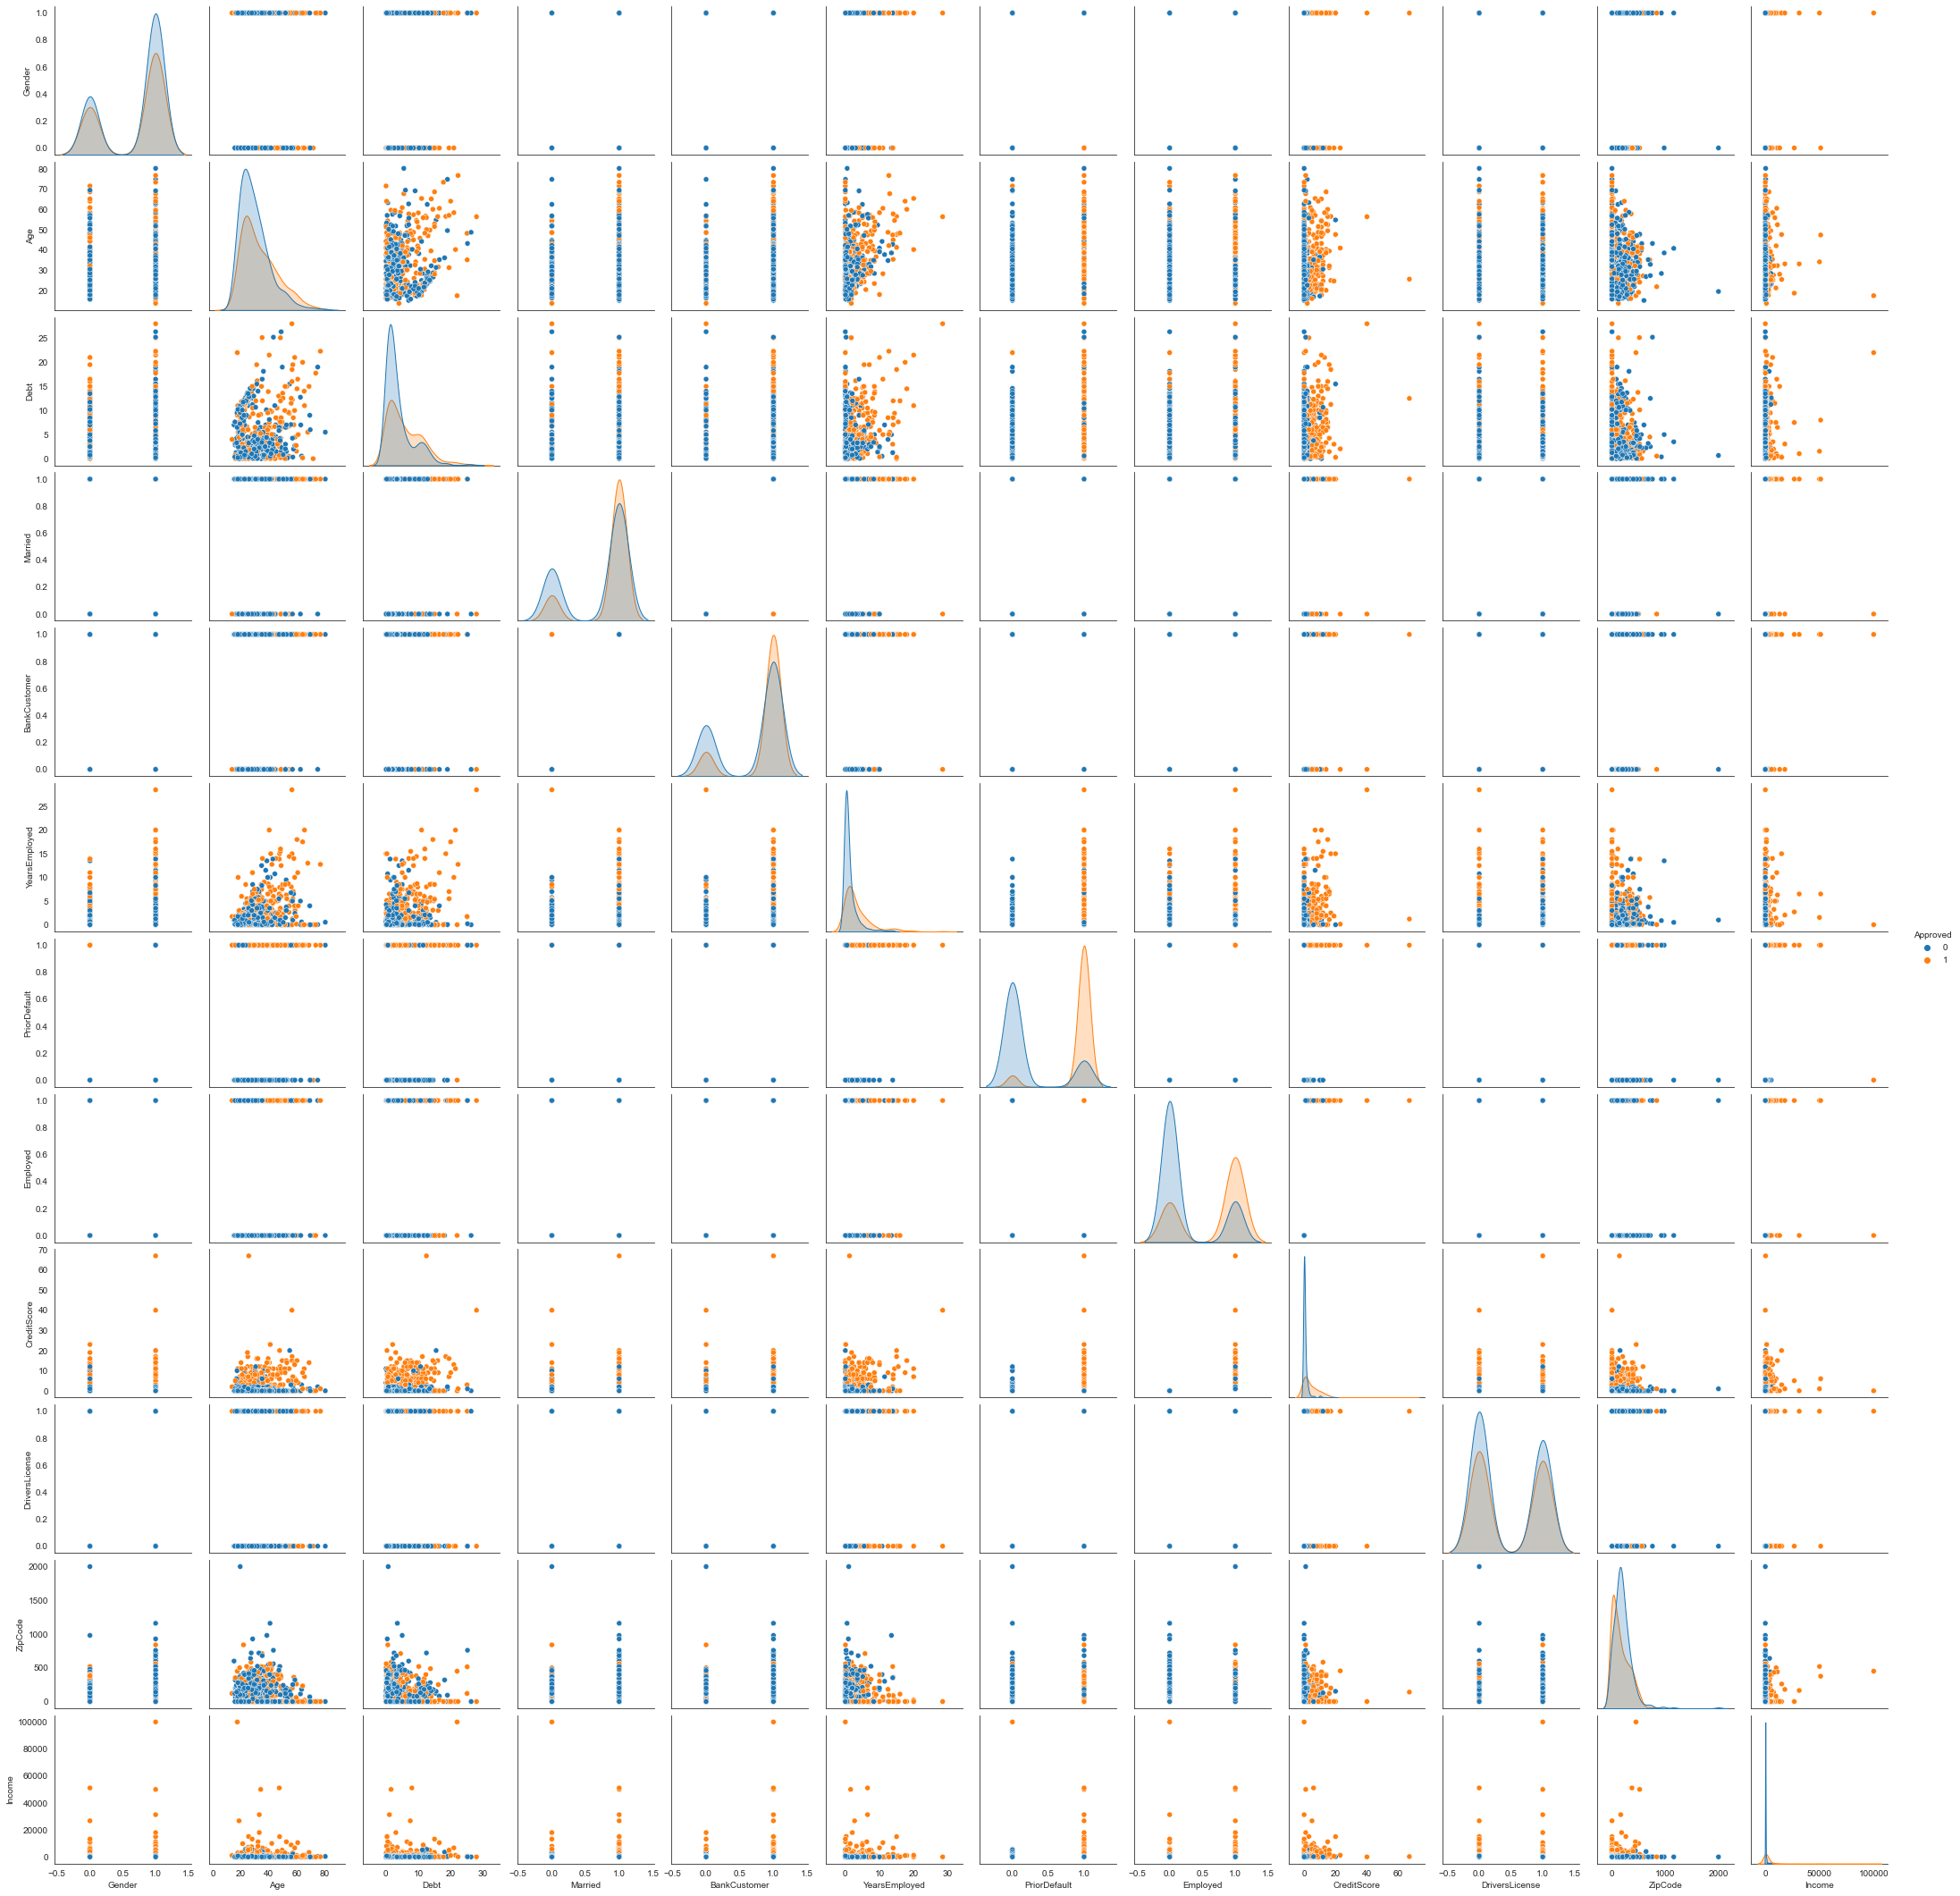

In [13]:
# Pair Plot
# Set the style to white
sns.set_style("white")

# Generate the pairplot with white axes
sns.pairplot(df, hue='Approved')

# Display the plot
plt.show()

ValueError: 'Approved' is not a valid format string (unrecognized character 'A')

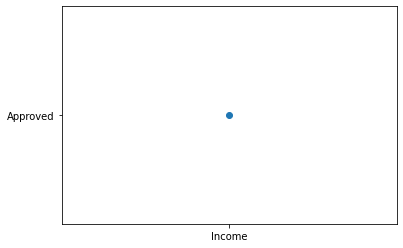

<Axes: >

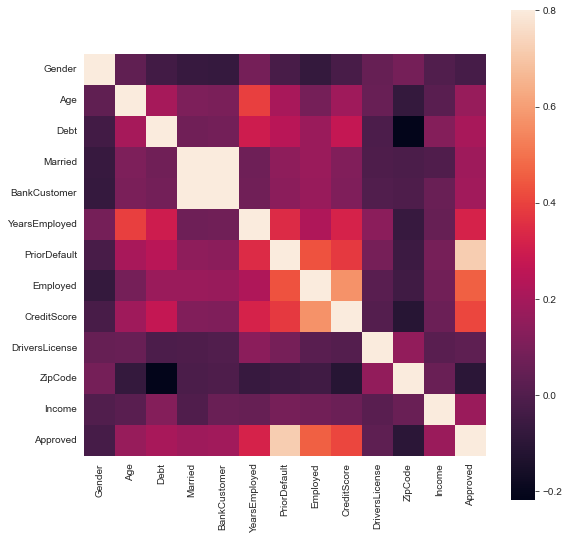

In [60]:
#Correlation
corrmat=df.corr()
f,ax=plt.subplots(figsize=(9,9))
sns.heatmap(corrmat,vmax=.8,square=True)

<Axes: xlabel='Approved', ylabel='count'>

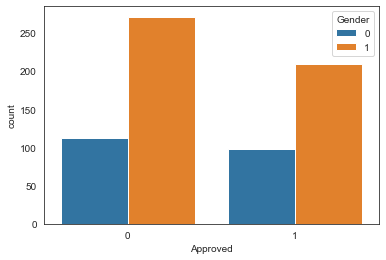

In [61]:
sns.countplot(x='Approved',data=df,hue="Gender")

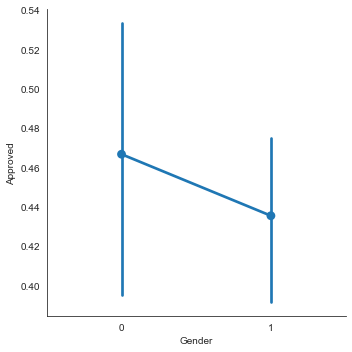

In [63]:
#point plot betwen Gender and Approved
sns.catplot(x="Gender",y="Approved",data=df,kind="point")
plt.show()

In [70]:

# Create income ranges
df['Income_Range'] = pd.cut(df['Income'], bins=[0, 1000, 2000, 3000, np.inf], labels=['<1000', '1000-2000', '2000-3000', '3000+'])

# Calculate approval percentage for each income range
summary_df = df.groupby('Income_Range')['Approved'].mean() * 100

print(summary_df)



Income_Range
<1000        37.883959
1000-2000    76.470588
2000-3000    82.608696
3000+        84.444444
Name: Approved, dtype: float64


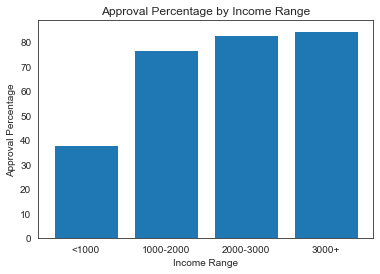

In [73]:
import matplotlib.pyplot as plt

# Create income ranges
df['Income_Range'] = pd.cut(df['Income'], bins=[0, 1000, 2000, 3000, np.inf], labels=['<1000', '1000-2000', '2000-3000', '3000+'])

# Calculate approval percentage for each income range
summary_df = df.groupby('Income_Range')['Approved'].mean() * 100

# Plot the data
plt.bar(summary_df.index, summary_df.values)
plt.xlabel('Income Range')
plt.ylabel('Approval Percentage')
plt.title('Approval Percentage by Income Range')
plt.show()


In [72]:
from scipy import stats

approved_income = df.loc[df['Approved'] == 1, 'Income']
not_approved_income = df.loc[df['Approved'] == 0, 'Income']

# Perform t-test
t_stat, p_value = stats.ttest_ind(approved_income, not_approved_income)

print('T-Statistic:', t_stat)
print('P-Value:', p_value)



T-Statistic: 4.680216020964486
P-Value: 3.4520256956287944e-06


The t-test results indicate that there is a significant difference in the income distributions between the approved and not approved cases. The calculated t-statistic is 4.680216020964486, and the corresponding p-value is 3.4520256956287944e-06.

Null Hypothesis: No Difference  come between approved and not approved

A low p-value suggests strong evidence against the null hypothesis, which in this case would be that there is no difference in income between the approved and not approved cases. 

Since the p-value is significantly smaller than the commonly used significance level of 0.05, we can reject the null hypothesis and conclude that there is a significant difference in income between the approved and not approved cases.

This finding suggests that income plays a role in determining credit card approval, as it is significantly associated with the approval status.

## Preprocessing the Data

In [33]:
#One Hot Encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in df.columns:
    if df[col].dtypes == object:
        df[col] = le.fit_transform(df[col])

df

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,7,4,1.25,1,1,1,0,0,202,0,1
1,0,58.67,4.460,1,1,9,1,3.04,1,1,6,0,0,43,560,1
2,0,24.50,0.500,1,1,9,1,1.50,1,0,0,0,0,280,824,1
3,1,27.83,1.540,1,1,7,4,3.75,1,1,5,1,0,100,3,1
4,1,20.17,5.625,1,1,7,4,1.71,1,0,0,0,1,120,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1,21.08,10.085,0,0,3,1,1.25,0,0,0,0,0,260,0,0
686,0,22.67,0.750,1,1,4,4,2.00,0,1,2,1,0,200,394,0
687,0,25.25,13.500,0,0,6,2,2.00,0,1,1,1,0,200,1,0
688,1,17.92,0.205,1,1,2,4,0.04,0,0,0,0,0,280,750,0


In [25]:
X=df.drop(columns="Approved",axis=1)
Y=df["Approved"]



In [26]:
print(X)

     Gender    Age    Debt  Married  BankCustomer         Industry Ethnicity  \
0         1  30.83   0.000        1             1      Industrials     White   
1         0  58.67   4.460        1             1        Materials     Black   
2         0  24.50   0.500        1             1        Materials     Black   
3         1  27.83   1.540        1             1      Industrials     White   
4         1  20.17   5.625        1             1      Industrials     White   
..      ...    ...     ...      ...           ...              ...       ...   
685       1  21.08  10.085        0             0        Education     Black   
686       0  22.67   0.750        1             1           Energy     White   
687       0  25.25  13.500        0             0       Healthcare    Latino   
688       1  17.92   0.205        1             1  ConsumerStaples     White   
689       1  35.00   3.375        1             1           Energy     Black   

     YearsEmployed  PriorDefault  Emplo

In [27]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
685    0
686    0
687    0
688    0
689    0
Name: Approved, Length: 690, dtype: int64


In [28]:
# Split into train/test sets
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, stratify=Y, random_state=2)

In [46]:
print(X.shape, X_train.shape, X_test.shape)

(690, 15) (552, 15) (138, 15)


# Logistic Regression

In [47]:
model=LogisticRegression()

In [24]:
model.fit(X_train,Y_train)

NameError: name 'X_train' is not defined

In [51]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy on Training data : ', training_data_accuracy)


Accuracy on Training data :  0.8188405797101449


In [52]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Test data :  0.7898550724637681


## Linear Regression

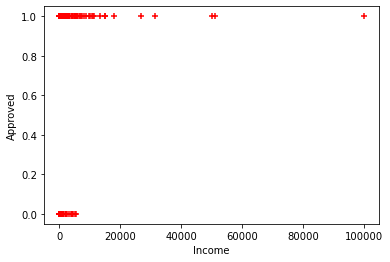

In [12]:
%matplotlib inline
plt.xlabel("Income")
plt.ylabel("Approved")
plt.scatter(df.Income,df.Approved,color="red",marker="+")

In [9]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier



In [16]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('SVC', SVC()))
models.append(('RF', RandomForestClassifier()))



In [17]:
scoring = 'accuracy'

In [18]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
result=[]
names=[]

In [34]:
for name,model in models:
    kfold = KFold(n_splits=10, shuffle=True, random_state=2)
    cv_result=cross_val_score(model,X_train,Y_train,cv=kfold,scoring=scoring)
    result.append(cv_result)
    names.append(name)
    print(model)
    print("%s %f"% (name,cv_result.mean()))
    

LogisticRegression()
LR nan
LinearDiscriminantAnalysis()
LDA nan
KNeighborsClassifier()
KNN nan
GaussianNB()
NB nan
DecisionTreeClassifier()
DT nan
SVC()
SVC nan
RandomForestClassifier()
RF nan


/Users/toluodunuga/opt/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/toluodunuga/opt/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/toluodunuga/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1508, in fit
    X, y = self._validate_data(
  File "/Users/toluodunuga/opt/miniconda3/lib/python3.9/site-packages/sklearn/base.py", line 581, in _validate_data
 

In [15]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


# Perform one-hot encoding on the dataset
df_encoded = pd.get_dummies(df, drop_first=True)

# Split the dataset into X and Y variables
X = df_encoded.drop('Approved', axis=1)
Y = df_encoded['Approved']

# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create an instance of LogisticRegression
LR = LogisticRegression()

# Fit the model to the training data
LR.fit(X_train, Y_train)

# Make predictions on the test data
predictions = LR.predict(X_test)

# Evaluate the model
print("Model Accuracy Score on Test Data: ", accuracy_score(Y_test, predictions))
print("Confusion Matrix:\n", confusion_matrix(Y_test, predictions))
print("Classification Report:\n", classification_report(Y_test, predictions))


Model Accuracy Score on Test Data:  0.7681159420289855
Confusion Matrix:
 [[58 10]
 [22 48]]
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.85      0.78        68
           1       0.83      0.69      0.75        70

    accuracy                           0.77       138
   macro avg       0.78      0.77      0.77       138
weighted avg       0.78      0.77      0.77       138



/Users/toluodunuga/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [17]:
import pickle
file='./credit_model8.pkl'
with open(file,'wb') as f:
    pickle.dump(LR,f)


In [43]:
with open(file,'rb') as f:
    mp=pickle.load(f)

In [44]:
df.columns

Index(['Gender', 'Age', 'Debt', 'Married', 'BankCustomer', 'Industry',
       'Ethnicity', 'YearsEmployed', 'PriorDefault', 'Employed', 'CreditScore',
       'DriversLicense', 'Citizen', 'ZipCode', 'Income', 'Approved'],
      dtype='object')

In [46]:
df=pd.read_csv('clean_dataset.csv')
df.head()

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,Industrials,White,1.25,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,1,Materials,Black,3.04,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,1,Materials,Black,1.50,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,1,Industrials,White,3.75,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,1,Industrials,White,1.71,1,0,0,0,ByOtherMeans,120,0,1


In [47]:
df["Industry"].value_counts()

Energy                   146
Materials                 78
Industrials               64
ConsumerDiscretionary     59
ConsumerStaples           54
Healthcare                53
Financials                51
InformationTechnology     41
CommunicationServices     38
Utilities                 38
Real Estate               30
Education                 25
Research                  10
Transport                  3
Name: Industry, dtype: int64

In [48]:
df["Citizen"].value_counts()

ByBirth         625
ByOtherMeans     57
Temporary         8
Name: Citizen, dtype: int64